In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

In [6]:
fp = r'States\Admin2.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df.head()

,ST_NM,geometry
0,Arunachal Pradesh,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."


In [7]:
map_df = map_df[map_df.ST_NM == "Assam"]

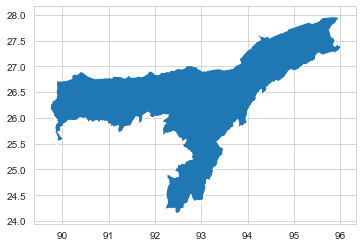

In [8]:
map_df.plot()

In [9]:
fp = r'Districts\Census_2011\2011_Dist.shp'
dis = gpd.read_file(fp)
dis.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [10]:
dis = dis[dis.ST_NM == "Assam"]

In [11]:
dis.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
36,Baksa,Assam,18,25,324,"POLYGON ((91.78311 26.49367, 91.77991 26.49523..."
58,Barpeta,Assam,18,4,303,"POLYGON ((91.16927 26.65240, 91.16787 26.64642..."
90,Bongaigaon,Assam,18,20,319,"POLYGON ((90.85418 26.52336, 90.85336 26.52153..."
97,Cachar,Assam,18,17,316,"POLYGON ((93.25235 24.97158, 93.25237 24.96905..."
115,Chirang,Assam,18,21,320,"POLYGON ((90.57322 26.79859, 90.58561 26.79725..."


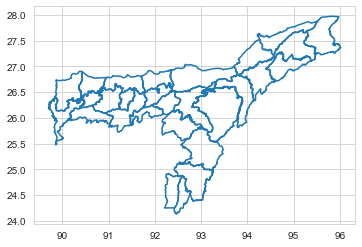

In [13]:
dis.boundary.plot()

In [15]:
xyz = pd.read_csv('district wise population and centroids.csv')

In [16]:
xyz.head()

,State,District,Latitude,Longitude,Population in 2001,Population in 2011
0,Andhra Pradesh,Anantapur,14.312066,77.460158,3640478,4081148
1,Andhra Pradesh,Chittoor,13.331093,78.927639,3745875,4174064
2,Andhra Pradesh,East Godavari,16.782718,82.243207,4901420,5154296
3,Andhra Pradesh,Guntur,15.884926,80.586576,4465144,4887813
4,Andhra Pradesh,Krishna,16.143873,81.148051,4187841,4517398


In [17]:
xyz = xyz[xyz.State == "Assam"]

,State,District,Latitude,Longitude,Population in 2001,Population in 2011
24,Assam,Barpeta,26.427872,90.979120,1394755,1693622
25,Assam,Bongaigaon,26.450125,90.673430,612665,738804
26,Assam,Cachar,24.815571,92.868497,1444921,1736617
27,Assam,Darrang,26.584632,92.041413,759858,928500
28,Assam,Dhemaji,27.586533,94.713369,571944,686133


In [19]:
xyz.drop(['Population in 2001', 'Population in 2011'], axis='columns', inplace=True)

In [20]:
xyz.head()

,State,District,Latitude,Longitude
24,Assam,Barpeta,26.427872,90.979120
25,Assam,Bongaigaon,26.450125,90.673430
26,Assam,Cachar,24.815571,92.868497
27,Assam,Darrang,26.584632,92.041413
28,Assam,Dhemaji,27.586533,94.713369


In [27]:
merged_dis = dis.set_index('DISTRICT').join(xyz.set_index('District'))
merged_dis.head()
merged_dis = merged_dis[merged_dis.Latitude.notna()]
merged_dis.head()

,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
DISTRICT,,,,,,,,
Barpeta,Assam,18,4,303,"POLYGON ((91.16927 26.65240, 91.16787 26.64642...",Assam,26.427872,90.979120
Bongaigaon,Assam,18,20,319,"POLYGON ((90.85418 26.52336, 90.85336 26.52153...",Assam,26.450125,90.673430
Cachar,Assam,18,17,316,"POLYGON ((93.25235 24.97158, 93.25237 24.96905...",Assam,24.815571,92.868497
Darrang,Assam,18,26,325,"POLYGON ((92.32865 26.67036, 92.33490 26.66867...",Assam,26.584632,92.041413
Dhemaji,Assam,18,9,308,"POLYGON ((94.58063 27.21371, 94.57922 27.21355...",Assam,27.586533,94.713369


In [28]:
merged_dis.reset_index(level=0, inplace=True)
merged_dis.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,State,Latitude,Longitude
0,Barpeta,Assam,18,4,303,"POLYGON ((91.16927 26.65240, 91.16787 26.64642...",Assam,26.427872,90.979120
1,Bongaigaon,Assam,18,20,319,"POLYGON ((90.85418 26.52336, 90.85336 26.52153...",Assam,26.450125,90.673430
2,Cachar,Assam,18,17,316,"POLYGON ((93.25235 24.97158, 93.25237 24.96905...",Assam,24.815571,92.868497
3,Darrang,Assam,18,26,325,"POLYGON ((92.32865 26.67036, 92.33490 26.66867...",Assam,26.584632,92.041413
4,Dhemaji,Assam,18,9,308,"POLYGON ((94.58063 27.21371, 94.57922 27.21355...",Assam,27.586533,94.713369


In [29]:
merged_dis.DISTRICT[0]

'Barpeta'

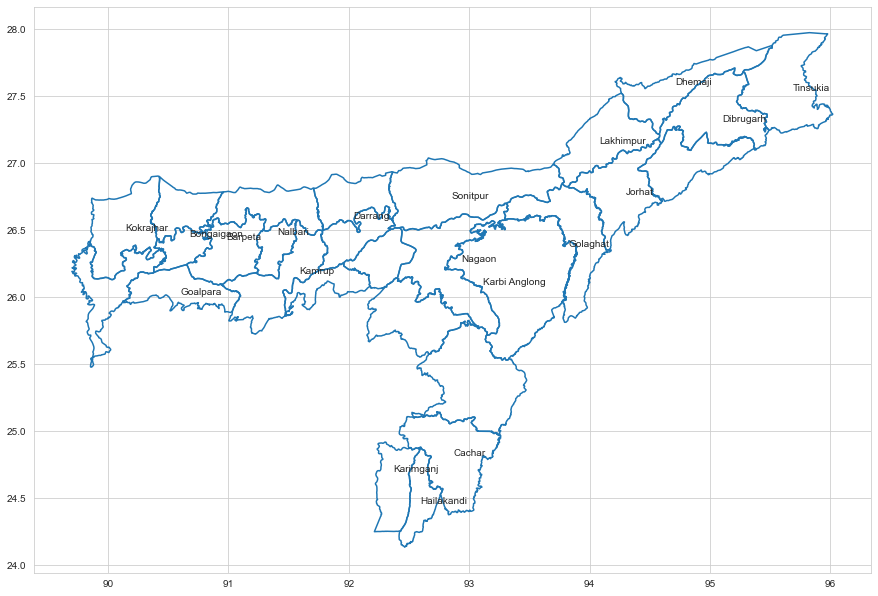

In [31]:
fig,ax = plt.subplots(figsize = (15,15))
dis.boundary.plot(ax = ax)
for i in range(len(xyz)):
    plt.text(merged_dis.Longitude[i],merged_dis.Latitude[i],"{}".format(merged_dis.DISTRICT[i]),size=10)